In [1]:
import pandas as pd #to read and handle data
df = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')#loads the data
df.head()#print 1 st 5

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [2]:
features = ['age', 'ejection_fraction', 'serum_creatinine']

mean_values = df[features].mean()
median_values = df[features].median()
mode_values = df[features].mode().iloc[0]


In [3]:
variance_values = df[features].var()
std_dev_values = df[features].std()
iqr_values = df[features].quantile(0.75) - df[features].quantile(0.25)


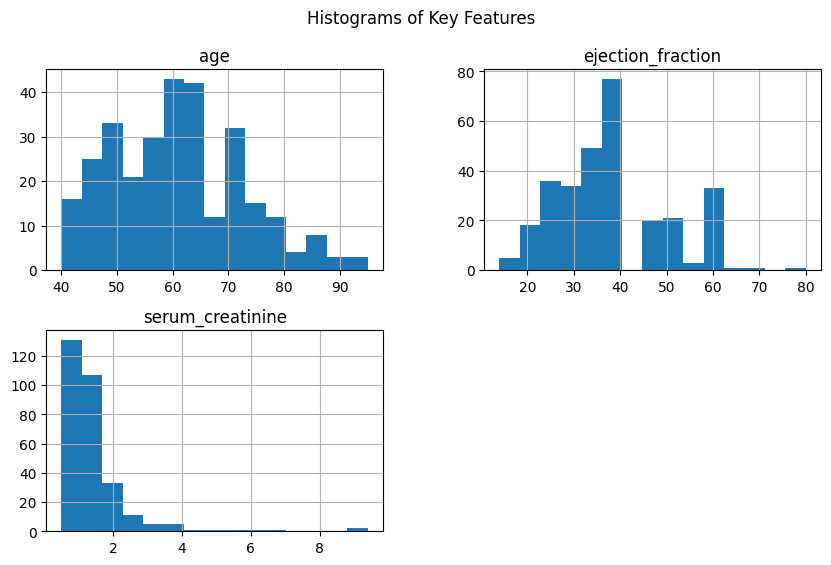

In [5]:
import matplotlib.pyplot as plt
df[features].hist(bins=15, figsize=(10, 6))
plt.suptitle("Histograms of Key Features")
plt.show()

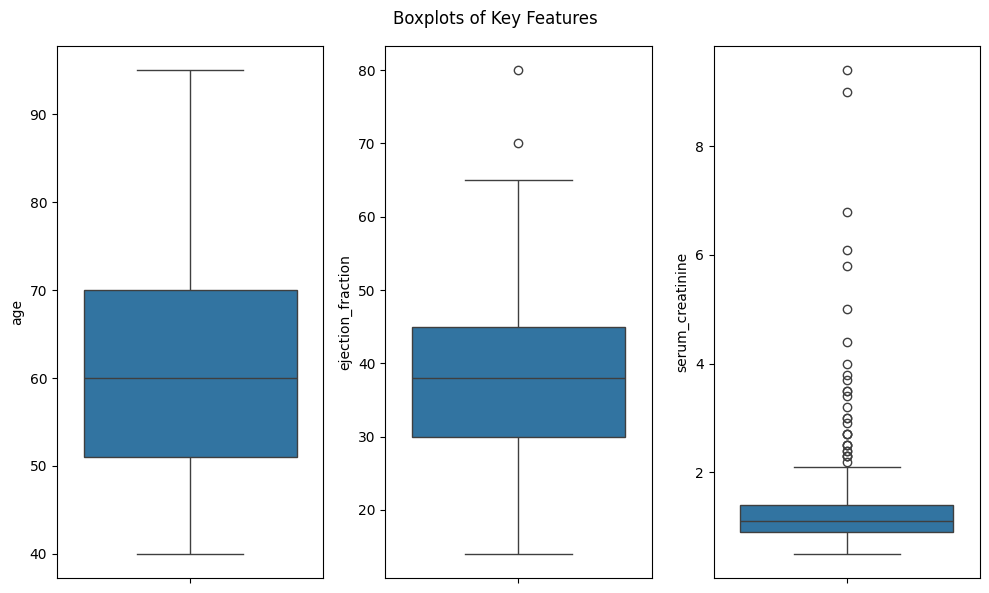

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for i, col in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])

plt.suptitle("Boxplots of Key Features")
plt.tight_layout()
plt.show()

In [8]:
from scipy.stats import ttest_ind

smokers = df[df['smoking'] == 1]['serum_creatinine']
non_smokers = df[df['smoking'] == 0]['serum_creatinine']

t_stat, p_val = ttest_ind(smokers, non_smokers, nan_policy='omit')


In [9]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['sex'], df['smoking'])
chi2, p, dof, expected = chi2_contingency(contingency_table)


In [10]:
correlation_matrix = df.corr()


<Axes: >

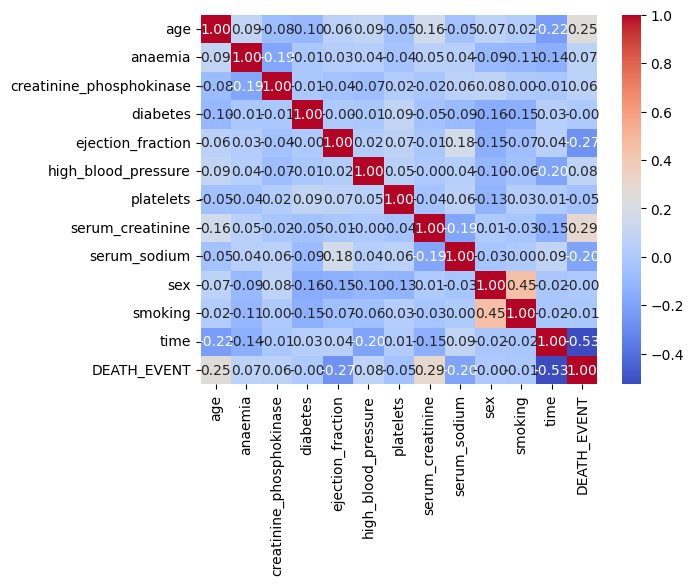

In [11]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")


In [12]:
corr_pairs = correlation_matrix.unstack().sort_values(ascending=False)


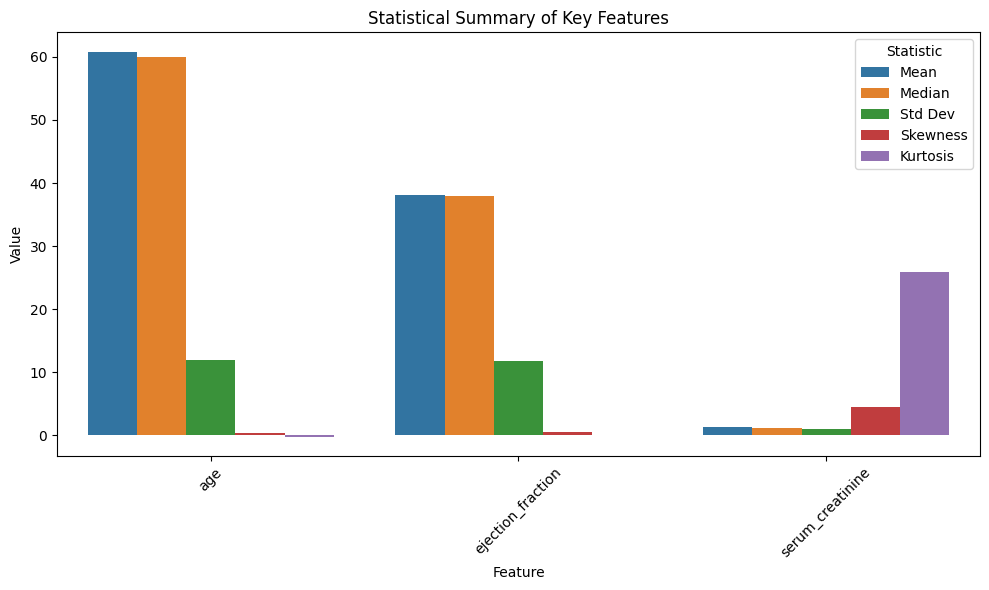

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reset index so 'features' become a column for plotting
summary_table_reset = summary_table.reset_index().rename(columns={'index': 'Feature'})

# Melt the dataframe for seaborn plotting
summary_melted = summary_table_reset.melt(id_vars='Feature',
                                          var_name='Statistic',
                                          value_name='Value')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=summary_melted, x='Feature', y='Value', hue='Statistic')
plt.title("Statistical Summary of Key Features")
plt.xticks(rotation=45)
plt.legend(title='Statistic')
plt.tight_layout()
plt.show()


In [15]:
1. Mean
The average of all values.
2. Median
The middle value when data is sorted.
3. Mode
The most frequent value in the dataset.

4. Variance
The average of the squared differences from the mean.
Higher variance → data points are more spread out.
Lower variance → data points are closer to the mean.

5. Standard Deviation
The square root of the variance.

6. Interquartile Range (IQR)
The difference between the third and first quartiles.

7.T-test
Compares the mean of two groups to see if they’re significantly different.



SyntaxError: invalid syntax (ipython-input-2487454533.py, line 1)

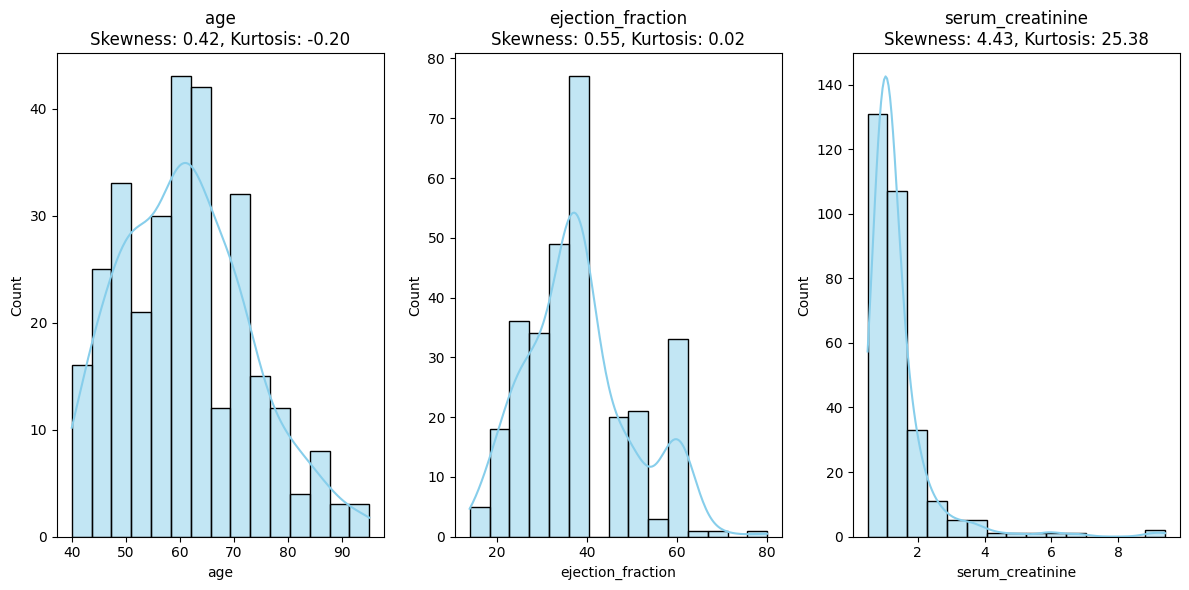

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

plt.figure(figsize=(12, 6))

for i, col in enumerate(features, 1):
    plt.subplot(1, 3, i)

    # Plot histogram with KDE curve
    sns.histplot(df[col], kde=True, bins=15, color="skyblue")

    # Calculate skewness & kurtosis
    skew_val = skew(df[col], nan_policy='omit')
    kurt_val = kurtosis(df[col], nan_policy='omit')

    # Title showing stats
    plt.title(f"{col}\nSkewness: {skew_val:.2f}, Kurtosis: {kurt_val:.2f}")

plt.tight_layout()
plt.show()
